# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# 3 неделя

In [ ]:
!rm -r sample_data

In [ ]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [ ]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## Анализ и первичная предобработка датафреймов с информацией о звонках

### Headliner

#### Загрузка датафреймов

In [ ]:
# Загружаем Headliner_df из pkl
with open(df_path + 'Headliner_df.pkl', 'rb') as f:
  Headliner_df = pkl.load(f)

# Загружаем Headliner_new_df из pkl
with open(df_path + 'Headliner_new_df.pkl', 'rb') as f:
  Headliner_new_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_calls_df из pkl
with open(df_path + 'Headliner_calls_df.pkl', 'rb') as f:
  Headliner_calls_df = pkl.load(f)

# Загружаем Headliner_new_calls_df из pkl
with open(df_path + 'Headliner_new_calls_df.pkl', 'rb') as f:
  Headliner_new_calls_df = pkl.load(f)

#### Первичная предобработка `Headliner_df`

##### Дата и время

In [ ]:
Headliner_df['Дата и время'].head()

0    2023-07-31 20:51:16
1    2023-07-31 19:57:08
2    2023-07-31 19:06:54
3    2023-07-31 17:52:01
4    2023-07-31 17:31:22
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Headliner_df['Дата и время'] = pd.to_datetime(Headliner_df['Дата и время'])

In [ ]:
Headliner_df['Дата и время'].tail()

4754   2023-07-31 14:46:50
4755   2023-07-31 15:52:11
4756   2023-07-31 15:54:00
4757   2023-07-31 19:06:54
4758   2023-07-31 20:51:16
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Headliner_df['Идентификатор сессии звонка'].head()

0    3128665492
1    3124867081
2    3128534127
3    3126905895
4    3123899209
Name: Идентификатор сессии звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Headliner_df['Идентификатор сессии звонка'].tail()

4754    3127740032
4755    3127967687
4756    3127973187
4757    3128534127
4758    3128665492
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Headliner_df['Длительность звонка'].head()

0    00:08:33
1    00:00:35
2    00:00:11
3    00:01:55
4    00:00:57
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Headliner_df['Длительность звонка'] = pd.to_datetime(Headliner_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_df['Длительность звонка'] = Headliner_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_df['Длительность звонка'].tail()

4754    105
4755     31
4756     83
4757    192
4758    170
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Headliner_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Headliner_df['Длительность звонка'].max()

1682

In [ ]:
# Средняя длительность звонка
Headliner_df['Длительность звонка'].mean()

111.03235973944106

##### Файл записи звонка

In [ ]:
Headliner_df.shape

(4759, 72)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Headliner_df = Headliner_df.merge(Headliner_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Headliner_df.shape

(4759, 73)

In [ ]:
Headliner_df['Файл записи звонка'][~Headliner_df['Файл записи звонка'].isnull()].head()

130    Записи звонков/Записи звонков_хедлайнер/2023-05-08_16-14-10.247769_from_74955199580_to_74997552563_session_2918538922_talk.mp3
142    Записи звонков/Записи звонков_хедлайнер/2023-05-09_11-53-48.291185_from_79910665524_to_74997552563_session_2919161802_talk.mp3
149        Записи звонков/Записи звонков_хедлайнер/2023-05-09_17-51-30.193682_from_79670165153_to_0188880_session_2919520238_talk.mp3
151    Записи звонков/Записи звонков_хедлайнер/2023-05-09_18-34-04.371381_from_79274431546_to_74997552563_session_2919550530_talk.mp3
152    Записи звонков/Записи звонков_хедлайнер/2023-05-09_20-19-21.050197_from_79274432048_to_74997552563_session_2919615074_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Headliner_df['Файл записи звонка'].count()

2045

##### Теги

In [ ]:
# Доля непустых записей
print(Headliner_df['Теги'].count())
print(Headliner_df.shape[0])

4759
4759


In [ ]:
# Количество уникальных тегов
Headliner_df['Теги'].nunique()

525

In [ ]:
# Количество уникальных тегов целевых звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('Первичный целевой')].nunique()

230

In [ ]:
# Количество уникальных тегов нецелевых звонков
Headliner_df['Теги'][~Headliner_df['Теги'].str.contains('Первичный целевой')].nunique()

295

In [ ]:
# Теги целевых звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('Первичный целевой')].unique()

array(['Первичный целевой - 2 очередь - ипотека - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - запись на просмотр - 3 очередь - 3-ком - 4-ком',
       'Первичный целевой - 2 очередь - 2-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком',
       'Лид - Первичный целевой - 2 очередь - 3 очередь - 3-ком - 4-ком',
       'Первичный целевой - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - ипотека - интересует рассрочка - 3 очередь - 1-ком',
       'уточнение - Первичный целевой - не определился',
       'Первичный целевой - интересует рассрочка - 3 очередь - 3-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 2-ком - 1-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком - 1-ком',
       'Первичный целевой - ипотека - студия - 1-ком',
       'Первичный целевой - интересует отделка - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Лид - Первичный целевой - 3 очередь - 4-ком',
       'интересуют с

In [ ]:
# Теги нецелевых звонков
Headliner_df['Теги'][~Headliner_df['Теги'].str.contains('Первичный целевой')].unique()

array(['спорный - нет соединения',
       'Лид - ПБ - 2 очередь - 2-ком - Условно целевой',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась',
       'Нецелевой звонок - ошибка',
       'постпродажное обслуживание - Вторичный целевой',
       'Условно целевой - Машиноместо',
       'спорный - не дозвонились до ОП номер не оставлен',
       'уточнение - Вторичный целевой', 'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - интересует ОП - 2-ком',
       '3 очередь - Условно целевой - отправить на WhatsApp',
       'Коммерческая недвижимость - Условно целевой',
       'Спам - возможно фрод',
       'спорный - номер взят не дозвонились  до ОП - 2-ком',
       'Вторичный целевой - запись на просмотр',
       'Нецелевой звонок - не интересует объект', 'Спам',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась - 3-ком',
       'Вторичный целевой - 3 очередь - 2-ком', 'Вторичный целевой',
       'повторная покупка - Втори

In [ ]:
# Количество уникальных тегов спорных звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('спорный')].nunique()

91

In [ ]:
# Теги спорных звонков
Headliner_df['Теги'][Headliner_df['Теги'].str.contains('спорный')].unique()

array(['спорный - нет соединения',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась',
       'спорный - не дозвонились до ОП номер не оставлен',
       'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - интересует ОП - 2-ком',
       'спорный - номер взят не дозвонились  до ОП - 2-ком',
       'Лид - спорный - 2 очередь - 2-ком - связь прервалась - 3-ком',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - Коммерческая недвижимость - номер взят не дозвонились  до ОП',
       'спорный - связь прервалась - 1-ком',
       'спорный - интересует ОП - Машиноместо',
       'Лид - спорный - 3-ком - связь прервалась на ОП',
       'спорный - студия - менеджер сам перезвонит - 3 очередь',
       'спорный - клиент просил перезвонить - Машиноместо',
       'Лид - спорный - номер взят не дозвонились  до ОП - 3-ком',
       'спорный - 2 очередь - связь прервалась - 4-ком',
       'Лид - спорный - интересу

##### Класс

In [ ]:
Headliner_df.shape

(4759, 73)

In [ ]:
# Добавляем столбец 'Класс'
Headliner_df['Класс'] = 'Нецелевой'

In [ ]:
# Размечаем целевые звонки
Headliner_df.loc[Headliner_df['Теги'].str.contains('Первичный целевой'), 'Класс'] = 'Целевой'

In [ ]:
# Размечаем спорные звонки
Headliner_df.loc[Headliner_df['Теги'].str.contains('спорный'), 'Класс'] = 'Спорный'

In [ ]:
# Соотношение классов
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Целевой'].count())
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Спорный'].count())
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Нецелевой'].count())
print('----')
print(Headliner_df['Класс'][Headliner_df['Класс'] == 'Целевой'].count() +
      Headliner_df['Класс'][Headliner_df['Класс'] == 'Спорный'].count() +
      Headliner_df['Класс'][Headliner_df['Класс'] == 'Нецелевой'].count())

503
3308
948
----
4759


<Axes: >

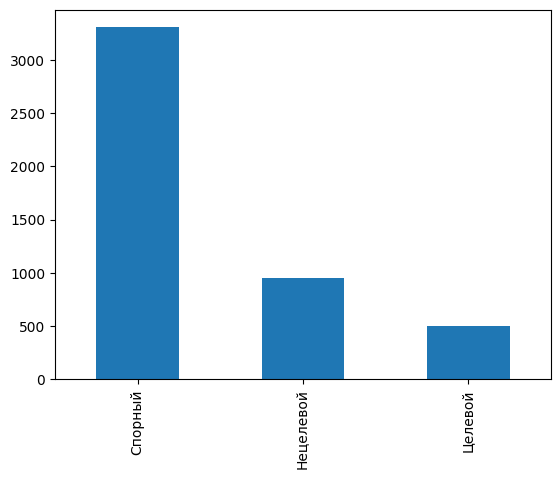

In [ ]:
# Соотношение классов
Headliner_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Headliner_df.shape

(4759, 74)

In [ ]:
# Добавляем столбец 'Проект'
Headliner_df['Проект'] = 'Headliner'

In [ ]:
Headliner_df.shape

(4759, 75)

#### Первичная предобработка `Headliner_new_df`

##### Дата и время

In [ ]:
Headliner_new_df['Дата и время'].head()

0    2023-08-23 09:11:37
1    2023-08-23 10:08:09
2    2023-08-23 10:39:19
3    2023-08-23 11:38:37
4    2023-08-23 11:40:07
Name: Дата и время, dtype: object

In [ ]:
# Приводим тип данных столбца 'Дата и время'
Headliner_new_df['Дата и время'] = pd.to_datetime(Headliner_new_df['Дата и время'])

In [ ]:
Headliner_new_df['Дата и время'].tail()

1537   2023-10-05 10:20:50
1538   2023-10-05 10:22:18
1539   2023-10-05 10:13:59
1540   2023-10-05 10:24:42
1541   2023-10-05 10:26:28
Name: Дата и время, dtype: datetime64[ns]

##### Идентификатор сессии звонка

In [ ]:
Headliner_new_df['Идентификатор сессии звонка'].head()

0    3128665492
1    3124867081
2    3128534127
3    3126905895
4    3123899209
Name: Идентификатор сессии звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Идентификатор сессии звонка'
Headliner_new_df = Headliner_new_df.astype({'Идентификатор сессии звонка': int})

In [ ]:
Headliner_new_df['Идентификатор сессии звонка'].tail()

1537    3277397412
1538    3277402692
1539    3277405642
1540    3277407497
1541    3277416842
Name: Идентификатор сессии звонка, dtype: int64

##### Длительность звонка

In [ ]:
Headliner_new_df['Длительность звонка'].head()

0    00:00:14
1    00:00:45
2    00:00:28
3    00:01:01
4    00:03:24
Name: Длительность звонка, dtype: object

In [ ]:
# Приводим тип данных столбца 'Длительность звонка'
Headliner_new_df['Длительность звонка'] = pd.to_datetime(Headliner_new_df['Длительность звонка']).dt.time

In [ ]:
# Переводим значение в количество секунд
Headliner_new_df['Длительность звонка'] = Headliner_new_df['Длительность звонка'].apply(lambda x: x.hour*60*60 + x.minute*60 + x.second)

In [ ]:
Headliner_new_df['Длительность звонка'].tail()

1537    118
1538      6
1539     79
1540     84
1541    132
Name: Длительность звонка, dtype: int64

In [ ]:
# Минимальная длительность звонка
Headliner_new_df['Длительность звонка'].min()

0

In [ ]:
# Максимальная длительность звонка
Headliner_new_df['Длительность звонка'].max()

9646

In [ ]:
# Средняя длительность звонка
Headliner_new_df['Длительность звонка'].mean()

124.42607003891051

##### Файл записи звонка

In [ ]:
Headliner_new_df.shape

(1542, 72)

In [ ]:
# Добавляем столбец 'Файл записи звонка'
Headliner_new_df = Headliner_new_df.merge(Headliner_new_calls_df[['Идентификатор сессии звонка','Файл записи звонка']], how='outer', on=['Идентификатор сессии звонка'])
Headliner_new_df.shape

(1542, 73)

In [ ]:
Headliner_new_df['Файл записи звонка'][~Headliner_new_df['Файл записи звонка'].isnull()].head()

0    Новые записи звонков/Записи Headliner/2023-08-23_09-11-45.552271_from_79166964481_to_74959339929_session_3169726155_talk.mp3
1    Новые записи звонков/Записи Headliner/2023-08-23_10-08-17.665887_from_79166964481_to_74959339929_session_3169874110_talk.mp3
3    Новые записи звонков/Записи Headliner/2023-08-23_11-38-45.818445_from_79166964481_to_74959339929_session_3170175215_talk.mp3
4    Новые записи звонков/Записи Headliner/2023-08-23_11-40-15.759104_from_79858009161_to_74957898990_session_3170179025_talk.mp3
5        Новые записи звонков/Записи Headliner/2023-08-23_11-41-28.642199_from_79123988128_to_0188880_session_3170187115_talk.mp3
Name: Файл записи звонка, dtype: object

In [ ]:
Headliner_new_df['Файл записи звонка'].count()

1226

##### Теги

In [ ]:
# Доля непустых записей
print(Headliner_new_df['Теги'].count())
print(Headliner_new_df.shape[0])

1535
1542


In [ ]:
# Количество уникальных тегов
Headliner_new_df['Теги'].nunique()

268

In [ ]:
# Количество уникальных тегов целевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].nunique()

82

In [ ]:
# Количество уникальных тегов нецелевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][~Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].nunique()

186

In [ ]:
# Теги целевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].unique()

array(['Лид - Первичный целевой - 2 очередь - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - ипотека - 3 очередь - 1-ком',
       'Первичный целевой - 3 очередь - 3-ком',
       'Первичный целевой - запись на просмотр - 3 очередь - 3-ком',
       'Лид - Первичный целевой - 2 очередь - 4-ком',
       'Первичный целевой - ипотека - 3 очередь - 2-ком',
       'Повторное более 3 месяцев целевой - Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3-ком',
       'Первичный целевой - запись на просмотр - не определился',
       'ПБ - Первичный целевой',
       'Первичный целевой - 2 очередь - 3 очередь - 1-ком',
       'Первичный целевой - 2 очередь - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - 1-2 ком',
       'Первичный целевой - интересует рассрочка - 3 очередь - 2-ком',
       'Первичный целевой - 2 очередь - 2-ком',
       'ПБ - Первичный целевой - студия - 3 очередь',
       'Первичный целевой - ипотека - студия - 3 

In [ ]:
# Теги нецелевых звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][~Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('Первичный целевой')].unique()

array(['спорный - нет соединения',
       'Вторичный целевой - 2 очередь - интересует трейд-ин',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - связь прервалась',
       'студия - Условно целевой - отправить на WhatsApp',
       'постпродажное обслуживание - Вторичный целевой',
       'ипотека - не проходит по бюджету - студия - 3 очередь - Условно целевой',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - поиск офиса продаж', 'Нецелевой звонок - ошибка',
       'Лид - спорный - связь прервалась - 1-ком',
       'повторная покупка - Вторичный целевой - 2 очередь - 2-ком - 1-ком',
       'постпродажное обслуживание - Вторичный целевой - негатив',
       'не устраивает планировка - 2-ком - Условно целевой',
       'Вторичный целевой - студия - 3 очередь',
       'спорный - клиент просил перезвонить',
       'спорный - 1-2 ком - 3 очередь - связь прервалась на ОП',
       'Коммерческая недвижимость - Условно целевой',
       'спо

In [ ]:
# Количество уникальных тегов спорных звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('спорный')].nunique()

65

In [ ]:
# Теги спорных звонков
Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()][Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].str.contains('спорный')].unique()

array(['спорный - нет соединения',
       'Лид - спорный - номер взят не дозвонились  до ОП - 1-ком',
       'спорный - связь прервалась',
       'спорный - номер взят не дозвонились  до ОП',
       'спорный - поиск офиса продаж',
       'Лид - спорный - связь прервалась - 1-ком',
       'спорный - клиент просил перезвонить',
       'спорный - 1-2 ком - 3 очередь - связь прервалась на ОП',
       'спорный - сотрудничество',
       'спорный - номер взят не дозвонились  до ОП - Машиноместо',
       'спорный - связь прервалась на ОП',
       'Лид - спорный - связь прервалась - 3-ком',
       'спорный - менеджер сам перезвонит - 1-ком',
       'спорный - номер взят не дозвонились  до ОП - 3-ком',
       'спорный - номер взят не дозвонились  до ОП - кладовка',
       'спорный - Коммерческая недвижимость - менеджер сам перезвонит',
       'спорный - номер взят не дозвонились  до ОП - 1-2 ком',
       'спорный - связь прервалась - 3-ком',
       'спорный - номер взят не дозвонились  до ОП - 2

##### Класс

In [ ]:
Headliner_new_df.shape

(1542, 73)

In [ ]:
# Добавляем столбец 'Класс'
Headliner_new_df['Класс'] = 'Неопределено'

In [ ]:
# Список тегов целевых звонков
target_teg_list = []
pattern = '.*первичный целевой.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    target_teg_list.append(teg)

In [ ]:
# Размечаем целевые звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(target_teg_list), 'Класс'] = 'Целевой'

In [ ]:
# Список тегов нецелевых звонков
not_target_teg_list = []
pattern = '.*первичный целевой.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if not re.findall(pattern.lower(), teg.lower()):
    not_target_teg_list.append(teg)

In [ ]:
# Размечаем нецелевые звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(not_target_teg_list), 'Класс'] = 'Нецелевой'

In [ ]:
# Список тегов спорных звонков
moot_teg_list = []
pattern = '.*спорный.*'
for teg in Headliner_new_df['Теги'][~Headliner_new_df['Теги'].isnull()].unique():
  if re.findall(pattern.lower(), teg.lower()):
    moot_teg_list.append(teg)

In [ ]:
# Размечаем спорные звонки
Headliner_new_df.loc[Headliner_new_df['Теги'].isin(moot_teg_list), 'Класс'] = 'Спорный'

In [ ]:
# Соотношение классов
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Целевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Спорный'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Нецелевой'].count())
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Неопределено'].count())
print('----')
print(Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Целевой'].count()   +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Спорный'].count()   +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Нецелевой'].count() +
      Headliner_new_df['Класс'][Headliner_new_df['Класс'] == 'Неопределено'].count())

194
951
390
7
----
1542


<Axes: >

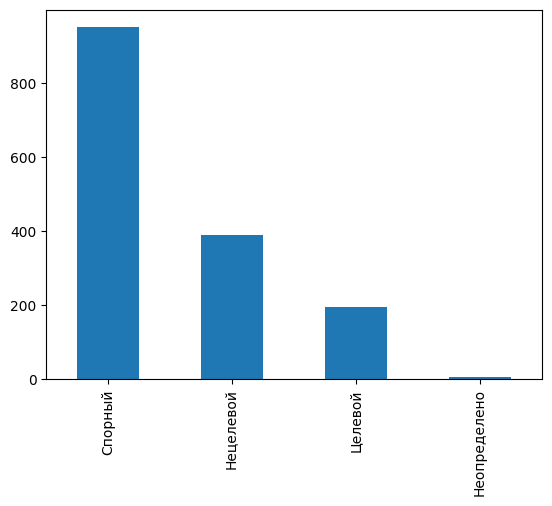

In [ ]:
# Соотношение классов
Headliner_new_df['Класс'].value_counts().plot.bar()

##### Проект

In [ ]:
Headliner_new_df.shape

(1542, 74)

In [ ]:
# Добавляем столбец 'Проект'
Headliner_new_df['Проект'] = 'Headliner'

In [ ]:
Headliner_new_df.shape

(1542, 75)

#### Анализ и сравнение датафреймов

In [ ]:
# Размеры
print(Headliner_df.shape)
print(Headliner_new_df.shape)
print()
print(Headliner_calls_df.shape)
print(Headliner_new_calls_df.shape)

(4759, 75)
(1542, 75)

(2045, 5)
(1226, 5)


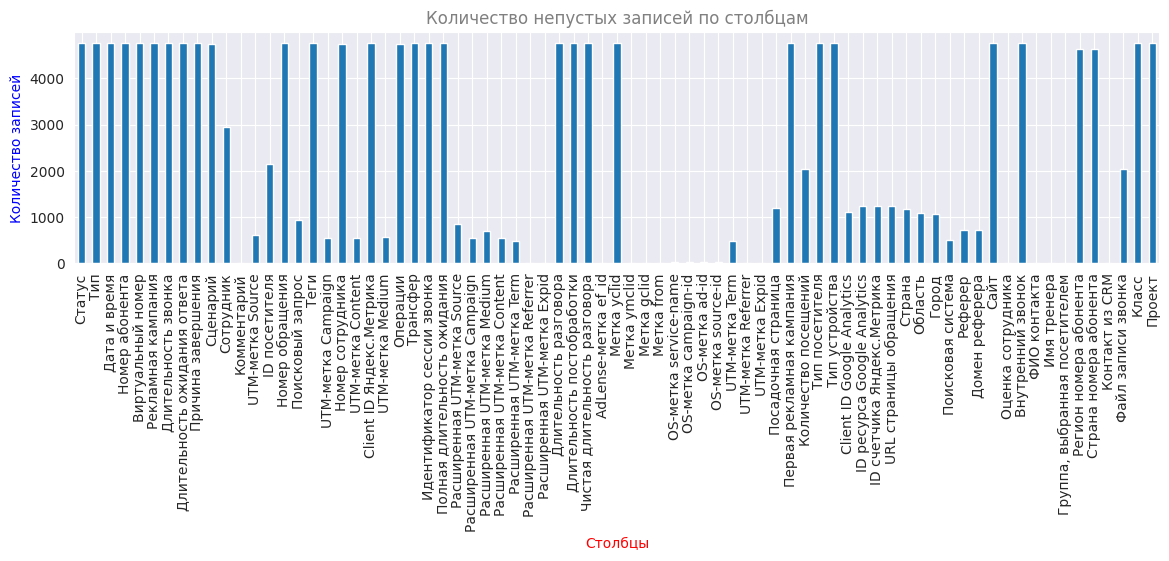

In [ ]:
# @title График Data.count
Data = Headliner_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

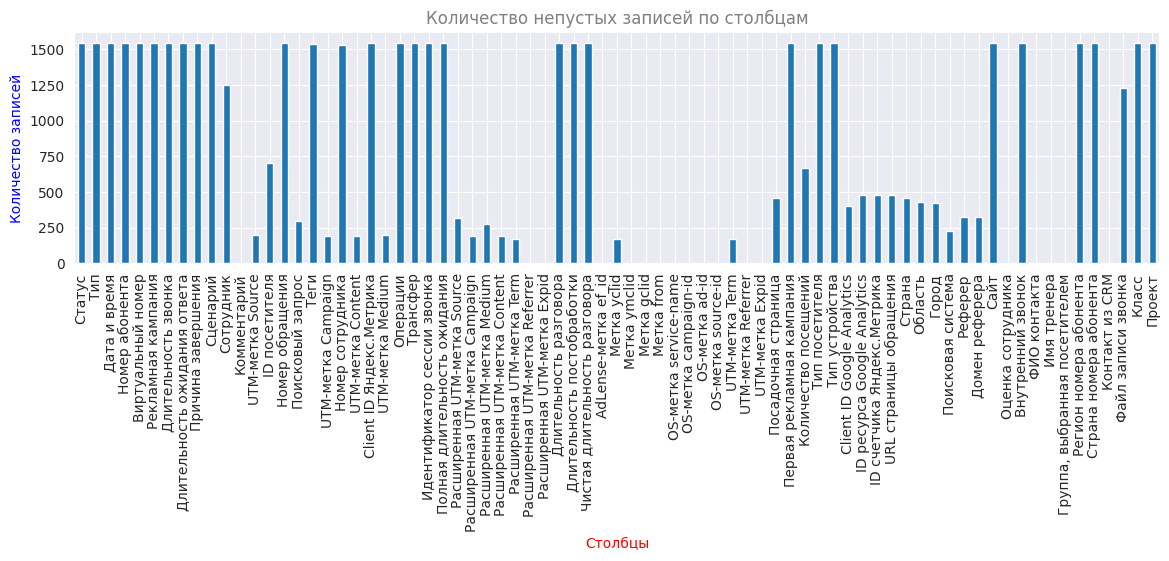

In [ ]:
# @title График Data.count
Data = Headliner_new_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.sort_values('Идентификатор сессии звонка')
Headliner_new_df = Headliner_new_df.sort_values('Идентификатор сессии звонка')
Headliner_df.index = range(Headliner_df.shape[0])
Headliner_new_df.index = range(Headliner_new_df.shape[0])

In [ ]:
# Сохраняем Headliner_df в pkl
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

# Сохраняем Headliner_new_df в pkl
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

### Primavera

#### Загрузка датафреймов

In [ ]:
# Загружаем Primavera_df из pkl
with open(df_path + 'Primavera_df.pkl', 'rb') as f:
  Primavera_df = pkl.load(f)

# Загружаем Primavera_new_df из pkl
with open(df_path + 'Primavera_new_df.pkl', 'rb') as f:
  Primavera_new_df = pkl.load(f)

In [ ]:
# Загружаем Primavera_calls_df из pkl
with open(df_path + 'Primavera_calls_df.pkl', 'rb') as f:
  Primavera_calls_df = pkl.load(f)

# Загружаем Primavera_new_calls_df из pkl
with open(df_path + 'Primavera_new_calls_df.pkl', 'rb') as f:
  Primavera_new_calls_df = pkl.load(f)

#### Сохранение датафреймов

In [ ]:
# Сохраняем Primavera_df в pkl
with open(df_path + 'Primavera_df.pkl', 'wb') as f:
  pkl.dump(Primavera_df, f)

# Сохраняем Primavera_new_df в pkl
with open(df_path + 'Primavera_new_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_df, f)

### Paveletskaya_city

#### Загрузка датафреймов

In [ ]:
# Загружаем Paveletskaya_df из pkl
with open(df_path + 'Paveletskaya_df.pkl', 'rb') as f:
  Paveletskaya_df = pkl.load(f)

# Загружаем Paveletskaya_city_df из pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_df из pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

In [ ]:
# Загружаем Paveletskaya_city_calls_df из pkl
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_calls_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_calls_df из pkl
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_new_calls_df = pkl.load(f)

#### Сохранение датафреймов

In [ ]:
# Сохраняем Paveletskaya_df в pkl
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

# Сохраняем Paveletskaya_city_df в pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

# Сохраняем Paveletskaya_city_new_df в pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)